# <font color=blue>__Introduction__</font>


The main purpose of this report is to reveal and justify the factors impacting to the attrition of employee and answer substantial questions such as: "What are key factors that are playing into current attrition rates?", "What are key factors that are playing into current satisfaction rates?" and "When are employees leaving?" based on the fictional generated IBM dataset. 
This report is structured as follows:
1. Load libraries and read the data
2. Data Analysis
3. Conclusion

## **1.Load libraries and read the data**

### **1.1 Load libraries**

In [1]:
#import libraries for this report

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import ttest_ind ## ttet
from scipy.stats import norm

### **1.2 Read data**

In [2]:
## read data
data=pd.read_csv('D:\ML_coures\ML_CBD\ibm-hr-analytics-attrition-dataset\WA_Fn-UseC_-HR-Employee-Attrition.csv')
data.info()
data.head()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


As displayed in the dataset information, there is no missing value (null) in the dataset. Furthermore, categorical and numerical data types are mixed in different columns. Thus, for categorical data type columns, they should be encoded.

### **1.3 Reassign data**

In [3]:
## this is applied for object data type 
data.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [4]:
data.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [5]:
data.Attrition.replace(to_replace=['Yes', 'No'],value=[1,0],inplace=True)
# need to use inplace to modify in the dataframe 

In [6]:
data.Attrition.value_counts() # recheck

0    1233
1     237
Name: Attrition, dtype: int64

In [7]:
data.BusinessTravel.value_counts()

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64

In [8]:
data.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [9]:
data.BusinessTravel.replace(to_replace=['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'],value=[1,2,0],inplace=True)

In [10]:
data.BusinessTravel.value_counts()

1    1043
2     277
0     150
Name: BusinessTravel, dtype: int64

In [11]:
data.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [12]:
data.Department.replace(to_replace=['Sales', 'Research & Development', 'Human Resources'],value=[2,1,0],inplace=True)

In [13]:
data.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [14]:
data.EducationField.replace(to_replace=['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'],value=[5,4,3,2,1,0],inplace=True)

In [15]:
data.Gender.unique()

array(['Female', 'Male'], dtype=object)

In [16]:
data.Gender.replace(to_replace=['Female', 'Male'],value=[1,0],inplace=True)

In [17]:
data.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [18]:
data.JobRole.replace(to_replace=['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],value=[1,2,3,4,5,6,7,8,9],inplace=True)

In [19]:
data.OverTime.unique()

array(['Yes', 'No'], dtype=object)

In [20]:
data.OverTime.replace(to_replace=['Yes', 'No'],value=[1,0],inplace=True)

Almost the important data in object type have been converted to numerical type. The data manipulation will be demonstrated in the next section.

## **2. Data Analysis**

In this notebook, we will conduct the analysis for two targets, namely the Attrition and the Job Satifaction. Thus, two targets are set as:

In [21]:
target_1='Attrition'
target_2='JobSatisfaction'

### **2.1. Analysis of factors that impact the attrition rate**

In [22]:
Attrition_rate=data[target_1].value_counts()/len(data)
Attrition_rate

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

Statistically, the percentage of employee leaving the company is 16.12%.

### **2.1.1 Monthly income against Attrition**

In [23]:
mon_vs_att=data[[target_1,'MonthlyIncome']]
mon_vs_att.head()

,Attrition,MonthlyIncome
0,1,5993
1,0,5130
2,1,2090
3,0,2909
4,0,3468


In [24]:
mon_vs_att_yes=mon_vs_att.loc[mon_vs_att.Attrition==1]
mon_vs_att_no=mon_vs_att.loc[mon_vs_att.Attrition==0]

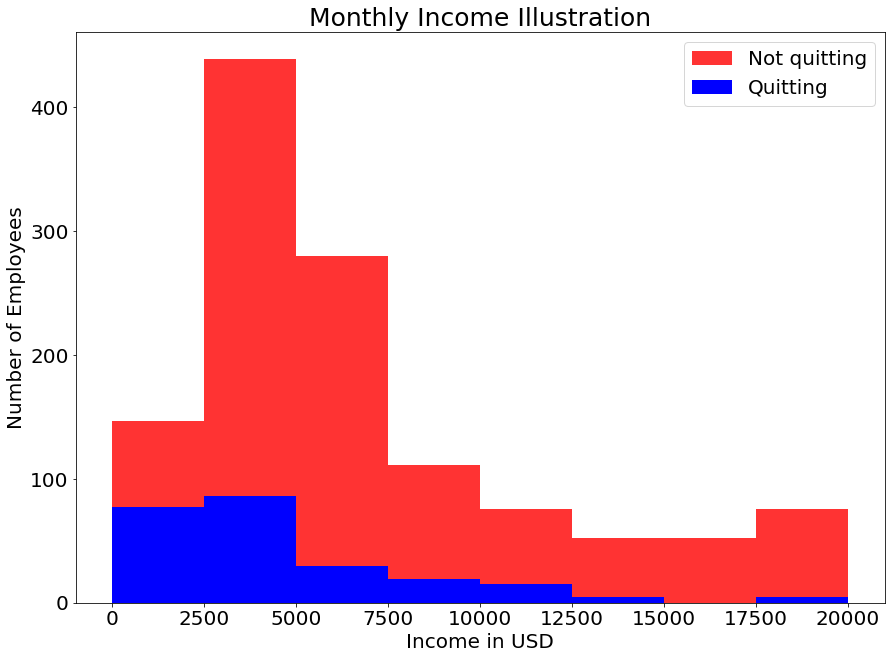

In [26]:
plt.title('Monthly Income Illustration',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
bin_plot=range(0,22500,2500)
h1=mon_vs_att_yes.MonthlyIncome.values
h2=mon_vs_att_no.MonthlyIncome.values
plt.hist(h2,alpha=0.8,bins=bin_plot, label='Not quitting',color='r')
plt.hist(h1,alpha=1.0,bins=bin_plot, label='Quitting',color='b')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Income in USD',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper right')
plt.show()



As observed in the above figures, employees who have less monthly income tend to quit the company compare to the one who stay. In order to prove this idea statistically, a t-test is then conducted with the null hypothesic (H0) is that monthly income lower than 7500 USD does not affect the atrrition rate.Thus, the data for this factor is then divided into two ranges, one is lower than 7500 USD and the rest.

In [27]:
a1=mon_vs_att[mon_vs_att.MonthlyIncome<=7500]['Attrition'] ## lower than 7500
a2=mon_vs_att[mon_vs_att.MonthlyIncome>7500]['Attrition']  ## greater than 7500

In [28]:
t, p =stats.ttest_ind(a1,a2,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(mon_vs_att)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = 3.53086  p = 0.00042701
T value with alpha=0.05 is: 1.64589


As a result, the t value from t test is larger than the t value for H0, thus H0 should be rejected. Undoubtedly, the low monthly income is one of the main reasons leads to attrition in this fictional data set.

### **2.1.2 Years At Company against Attrition**

In [29]:
yac_vs_att=data[[target_1,'YearsAtCompany']]
yac_vs_att.head()

,Attrition,YearsAtCompany
0,1,6
1,0,10
2,1,0
3,0,8
4,0,2


In [30]:
yac_vs_att_yes=yac_vs_att.loc[yac_vs_att.Attrition==1]
yac_vs_att_no=yac_vs_att.loc[yac_vs_att.Attrition==0]

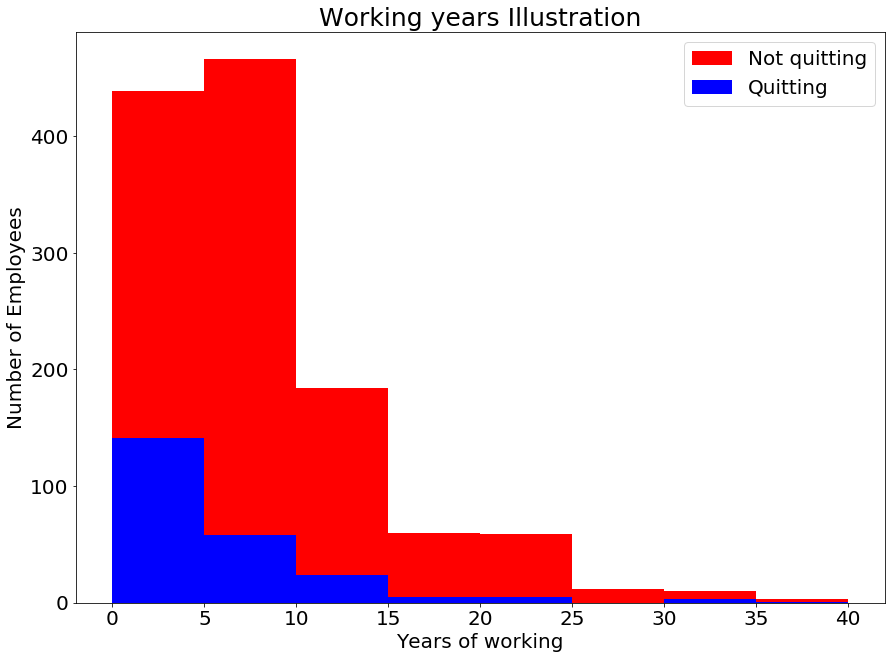

In [31]:
plt.title('Working years Illustration',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
bin_plot=range(0,45,5)
h1=yac_vs_att_yes.YearsAtCompany.values
h2=yac_vs_att_no.YearsAtCompany.values
plt.hist(h2,alpha=1.0,bins=bin_plot, label='Not quitting',color='r')
plt.hist(h1,alpha=1.0,bins=bin_plot, label='Quitting',color='b')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Years of working',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper right')
plt.show()

As illustrated in the figures, the employees are going to leave before 10 years of working for the company. To insure this comment, a t-test is conducted with the null hypothesis (H0) as employees who have worked for the company for less than 10 years are going to stay in the company. 

In [34]:
a1=yac_vs_att[yac_vs_att.YearsAtCompany<=10]['Attrition'] ## lower than 10 years working
a2=yac_vs_att[yac_vs_att.YearsAtCompany>10]['Attrition']  ## greater than 10 years working

In [35]:
t, p =stats.ttest_ind(a1,a2,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(yac_vs_att)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = 3.75101  p = 0.000182974
T value with alpha=0.05 is: 1.64589


Again, the t value from t test is larger than the t value for H0, thus H0 should be rejected. In other words, employees tend to leave the company before 10 years of working. Therefore, years of working at the company also contribute to the attrition rate. 

### **2.1.3 OverTime against Attrition**

In [36]:
ovt_vs_att=data[[target_1,'OverTime']]
ovt_vs_att.head()

,Attrition,OverTime
0,1,1
1,0,0
2,1,1
3,0,1
4,0,0


In [37]:
a1=ovt_vs_att[(ovt_vs_att.OverTime==1)]
a2=ovt_vs_att[(ovt_vs_att.OverTime==0)]
a2.head()

,Attrition,OverTime
1,0,0
4,0,0
5,0,0
7,0,0
8,0,0


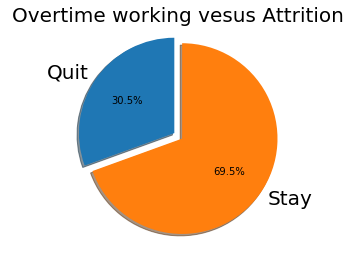

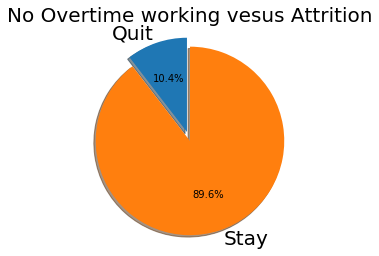

In [38]:

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'Quit', 'Stay'
sizes = [a1[(a1.Attrition==1)].Attrition.count()/len(a1)*100,a1[(a1.Attrition==0)].Attrition.count()/len(a1)*100]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('Overtime working vesus Attrition',fontsize=20)
plt.show()
labels = 'Quit', 'Stay'
sizes = [a2[(a2.Attrition==1)].Attrition.count()/len(a2)*100,a2[(a2.Attrition==0)].Attrition.count()/len(a2)*100]
explode = (0.1, 0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal')
plt.title('No Overtime working vesus Attrition',fontsize=20)
plt.show()

One may say that the employees who worked overtime tends to leave the company, thus to qualify this statement, a t-test is conducted with the hypothesis (H0) is that Over time does not affect the attrition rate.

In [39]:
a3=a1.Attrition
a4=a2.Attrition
t, p =stats.ttest_ind(a3,a4,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(ovt_vs_att)-2)
print('T value with alpha=0.05 is: %g'%t_real)


ttest_ind:            t = 9.72916  p = 1.00925e-21
T value with alpha=0.05 is: 1.64589


Obviously, the H0 is rejected due to the value of t of the t-test. Therefore, we can conclude that overtime lead to attrition in the company.

### **2.1.4 Education Field against Attrition**

In [40]:
edf_vs_att=data[[target_1,'EducationField']]
edf_vs_att.head()

,Attrition,EducationField
0,1,5
1,0,5
2,1,4
3,0,5
4,0,3


In [41]:
edf_vs_att_yes=edf_vs_att.loc[edf_vs_att.Attrition==1]
edf_vs_att_no=edf_vs_att.loc[edf_vs_att.Attrition==0]

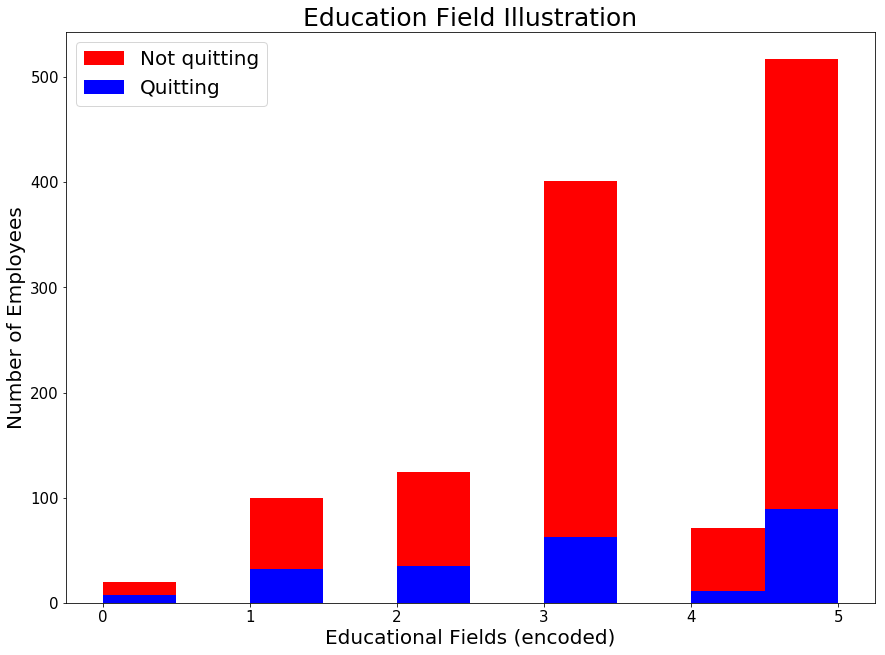

In [45]:
h1=edf_vs_att_yes.EducationField.values
h2=edf_vs_att_no.EducationField.values
plt.title('Education Field Illustration',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.hist(h2,alpha=1.0, label='Not quitting',color='r')
plt.hist(h1,alpha=1.0, label='Quitting',color='b')
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.xlabel('Educational Fields (encoded)',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper left')
plt.show()


Employees who are educated in Medical (3) and Life Science (5) tends to leave the company but also the one who stay the most in the company. To confirm this, the hypothesis (H0) :"Education Field in Medical and Life science do not contribute to the attrition rate" is proposed for a t-test.

In [46]:
a1=edf_vs_att[edf_vs_att.EducationField.isin([3,5])]['Attrition'] ## educated in Medical and Life science
a2=edf_vs_att[edf_vs_att.EducationField.isin([0,1,2,4])]['Attrition']  ## the rest

In [47]:
t, p =stats.ttest_ind(a1,a2,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(edf_vs_att)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = -3.27836  p = 0.00106855
T value with alpha=0.05 is: 1.64589


By using the t-test, we can see that education field also builds up to the attrition rate.

### **2.1.5 Distance From Home against Attrition**

In [48]:
dfh_vs_att=data[[target_1,'DistanceFromHome']]
dfh_vs_att.head()

,Attrition,DistanceFromHome
0,1,1
1,0,8
2,1,2
3,0,3
4,0,2


In [49]:
dfh_vs_att_yes=dfh_vs_att.loc[dfh_vs_att.Attrition==1]
dfh_vs_att_no=dfh_vs_att.loc[dfh_vs_att.Attrition==0]

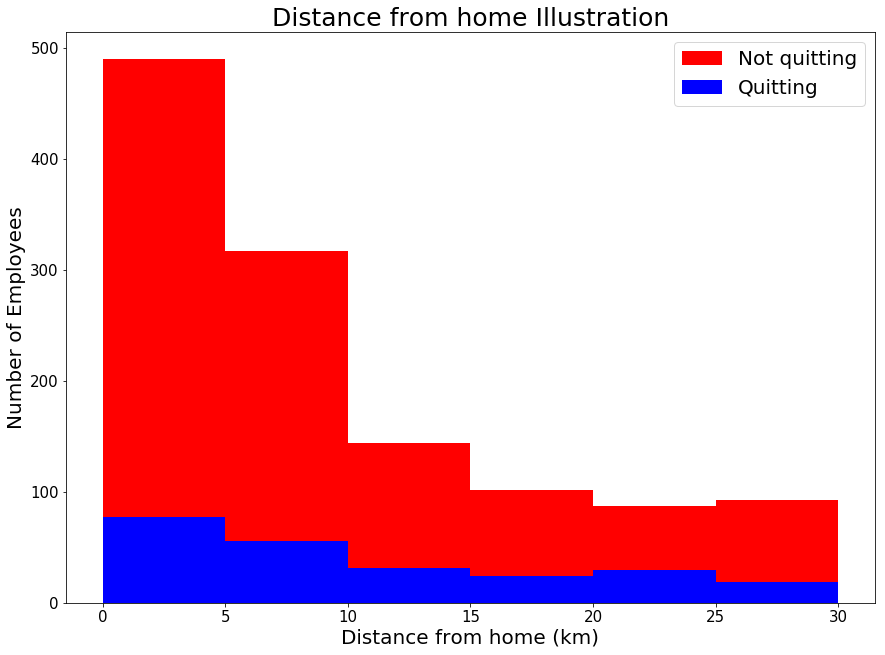

In [50]:
h1=dfh_vs_att_yes.DistanceFromHome.values
h2=dfh_vs_att_no.DistanceFromHome.values
plt.title('Distance from home Illustration',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
bin_plot=range(0,35,5)
plt.hist(h2,alpha=1.0,bins=bin_plot, label='Not quitting',color='r')
plt.hist(h1,alpha=1.0,bins=bin_plot, label='Quitting',color='b')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Distance from home (km)',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper right')
plt.show()

Illustrated in the above figures, employees who leave within the range of 10 km near the company tend to quit the company compare to the one who stay. A t-test is then conducted with the null hypothesic (H0) that living location has no impact to the attrition, or in other words, within 10 km and futher have same impact.

In [51]:
a1=dfh_vs_att[dfh_vs_att.DistanceFromHome<=10]['Attrition'] ## lower than 10 km
a2=dfh_vs_att[dfh_vs_att.DistanceFromHome>10]['Attrition']  ## greater than 10 km

In [52]:
t, p =stats.ttest_ind(a1,a2,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(dfh_vs_att)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = -3.31839  p = 0.000927551
T value with alpha=0.05 is: 1.64589


Based on the result of the t-test, the location of living within 10km has different impact to the attrition rate rather than poeple who leave further to the company. If it is the case, employees lost in attrition may eager to seek for another job in the area.

## **2.2. Analysis of factors that impact the Job Satisfation**

### **2.2.1 Department against Job Satisfaction**

In [53]:
dpm_vs_jsf=data[[target_2,'Department']]
dpm_vs_jsf[target_2].value_counts()

4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64

In [54]:
a1=dpm_vs_jsf[(dpm_vs_jsf.Department==2)] #job satisfaction in Sales
a2=dpm_vs_jsf[(dpm_vs_jsf.Department==1)] #job satisfaction in R&D
a3=dpm_vs_jsf[(dpm_vs_jsf.Department==0)] #job satisfaction in HR

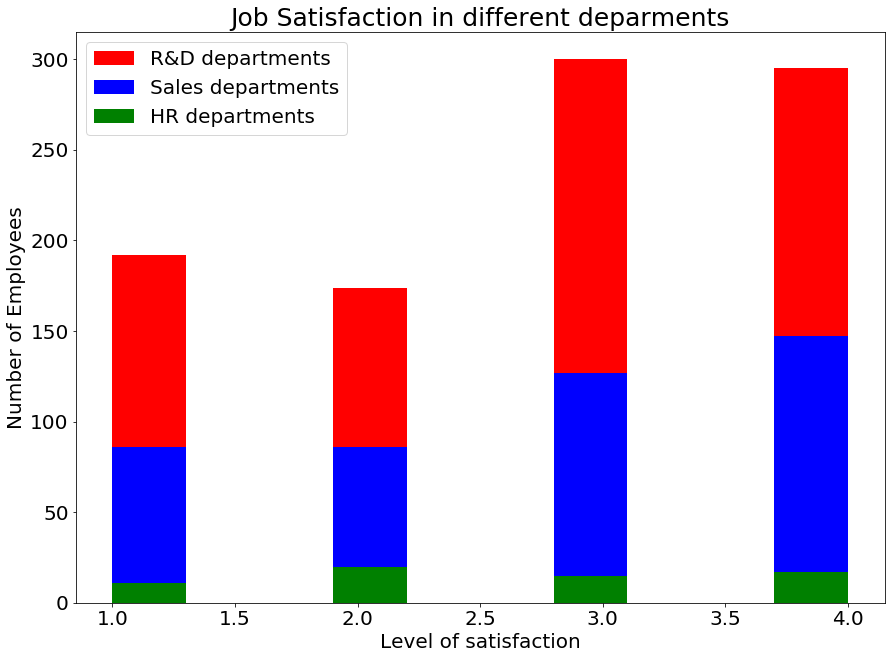

In [55]:
h1=a1.JobSatisfaction.values
h2=a2.JobSatisfaction.values
h3=a3.JobSatisfaction.values
plt.title('Job Satisfaction in different deparments',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.hist(h2,alpha=1.0, label='R&D departments',color='r')
plt.hist(h1,alpha=1.0, label='Sales departments',color='b')
plt.hist(h3,alpha=1.0, label='HR departments',color='g')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Level of satisfaction',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper left')
plt.show()




As can be seen, the HR department has lower job satisfaction the other departments. Then the hypothesis H0 to confirm that idea is that people work in HR department share the same job satisfation with other deparments.

In [56]:
a1=dpm_vs_jsf[(dpm_vs_jsf.Department==0)].JobSatisfaction
a3=dpm_vs_jsf[(dpm_vs_jsf.Department.isin([1,2]))].JobSatisfaction # in others

In [57]:
t, p =stats.ttest_ind(a1,a3,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(dpm_vs_jsf)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = -0.922426  p = 0.356458
T value with alpha=0.05 is: 1.64589


Due to the fact that the t value from the t-test is in the range of the real t value, thus we should accept that working in HR department has the same impact on the job satisfaction with the confidence is 64.5 %.

### **2.2.2 Marital Status  against Job Satisfaction**

In [58]:
mst_vs_jsf=data[[target_2,'MaritalStatus']]
mst_vs_jsf.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [59]:
a1=mst_vs_jsf[(mst_vs_jsf.MaritalStatus=='Divorced')] #job satisfaction for divorced employees
a2=mst_vs_jsf[(mst_vs_jsf.MaritalStatus=='Married')]  #job satisfaction for married employees
a3=mst_vs_jsf[(mst_vs_jsf.MaritalStatus=='Single')]   #job satisfaction for single employees

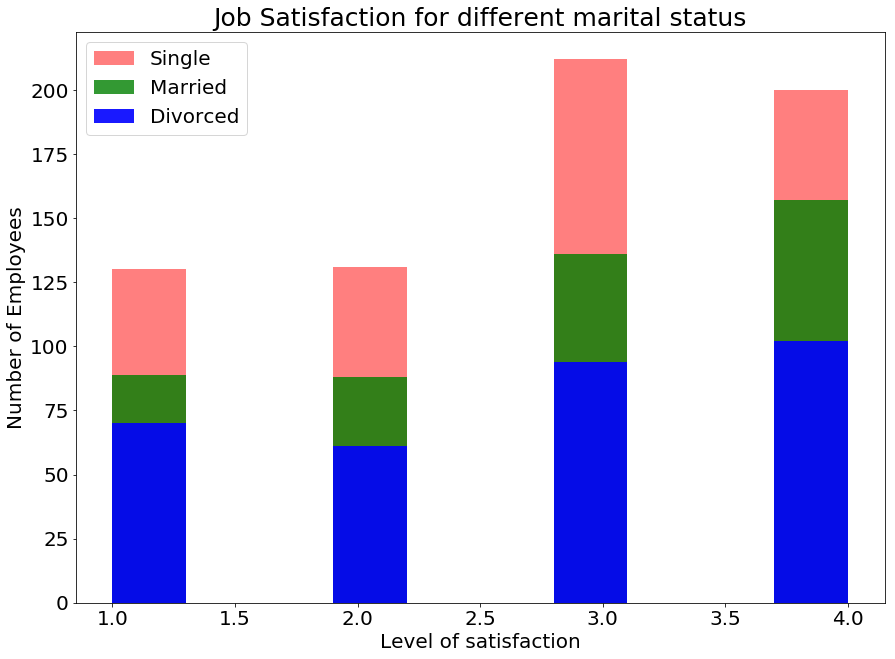

In [60]:
h1=a1.JobSatisfaction.values
h2=a2.JobSatisfaction.values
h3=a3.JobSatisfaction.values
plt.title('Job Satisfaction for different marital status',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.hist(h2,alpha=0.5, label='Single',color='r')
plt.hist(h3,alpha=0.8, label='Married',color='g')
plt.hist(h1,alpha=0.9, label='Divorced',color='b')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Level of satisfaction',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper left')
plt.show()

There is a slightly difference for the divorced employees, they seem to be less happy than the others when working in the company. Thus, the hypothesis (H0) to test this idea is that "All employees with different marital status are all satisfied with there job".

In [61]:
a1=mst_vs_jsf[(mst_vs_jsf.MaritalStatus=='Divorced')].JobSatisfaction
a3=mst_vs_jsf[(mst_vs_jsf.MaritalStatus.isin(['Single', 'Married']))].JobSatisfaction # in others

In [62]:
t, p =stats.ttest_ind(a1,a3,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(mst_vs_jsf)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = -0.582331  p = 0.560433
T value with alpha=0.05 is: 1.64589


Suprisingly, the H0 is accepted with the confidence of 44%. In other words, marital status does not affect the job satisfaction.

### **2.2.3 Gender against Job Satisfaction**

In [63]:
gd_vs_jsf=data[[target_2,'Gender']]
gd_vs_jsf.head()

,JobSatisfaction,Gender
0,4,1
1,2,0
2,3,0
3,3,1
4,2,0


In [64]:
a1=gd_vs_jsf[(gd_vs_jsf.Gender==0)] #job satisfaction for male
a2=gd_vs_jsf[(gd_vs_jsf.Gender==1)] #job satisfaction for female

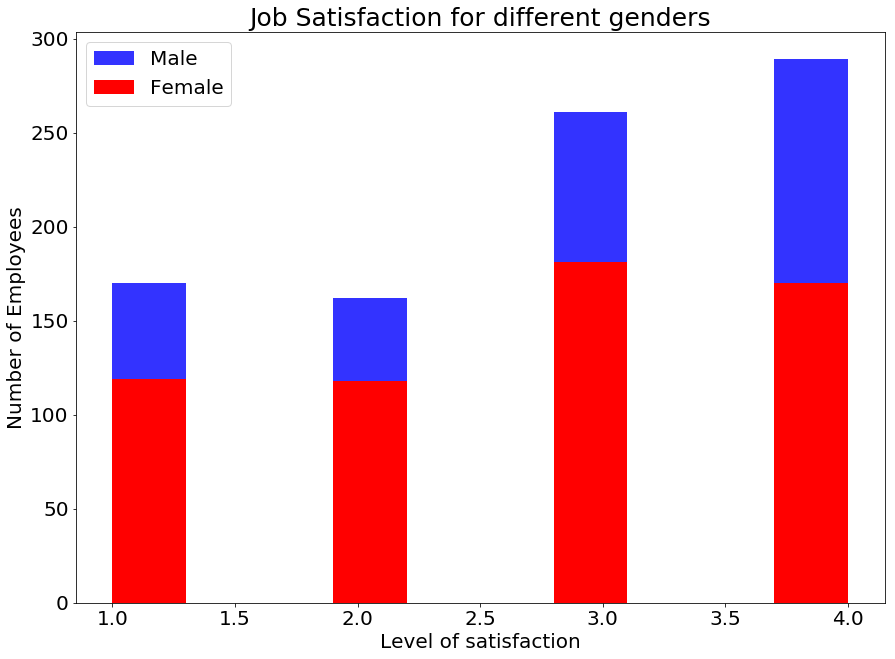

In [65]:
h1=a1.JobSatisfaction.values
h2=a2.JobSatisfaction.values
plt.title('Job Satisfaction for different genders',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.hist(h1,alpha=0.8, label='Male',color='b')
plt.hist(h2,alpha=1.0, label='Female',color='r')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Level of satisfaction',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Let see if there is any impact from the gender to job satisfaction.

In [66]:
a1=a1.JobSatisfaction
a2=a2.JobSatisfaction
t, p =stats.ttest_ind(a1,a2,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(mst_vs_jsf)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = 1.27473  p = 0.202608
T value with alpha=0.05 is: 1.64589


We can conclude with 80 % of confidence that gender has no impact to the job satisfaction.

### **2.2.4 OverTime against Job Satisfaction**

In [67]:
ovt_vs_jsf=data[[target_2,'OverTime']]
ovt_vs_jsf.head()

,JobSatisfaction,OverTime
0,4,1
1,2,0
2,3,1
3,3,1
4,2,0


In [68]:
a1=ovt_vs_jsf[(ovt_vs_jsf.OverTime==0)] #job satisfaction with no over time working
a2=ovt_vs_jsf[(ovt_vs_jsf.OverTime==1)] #job satisfaction with over time working

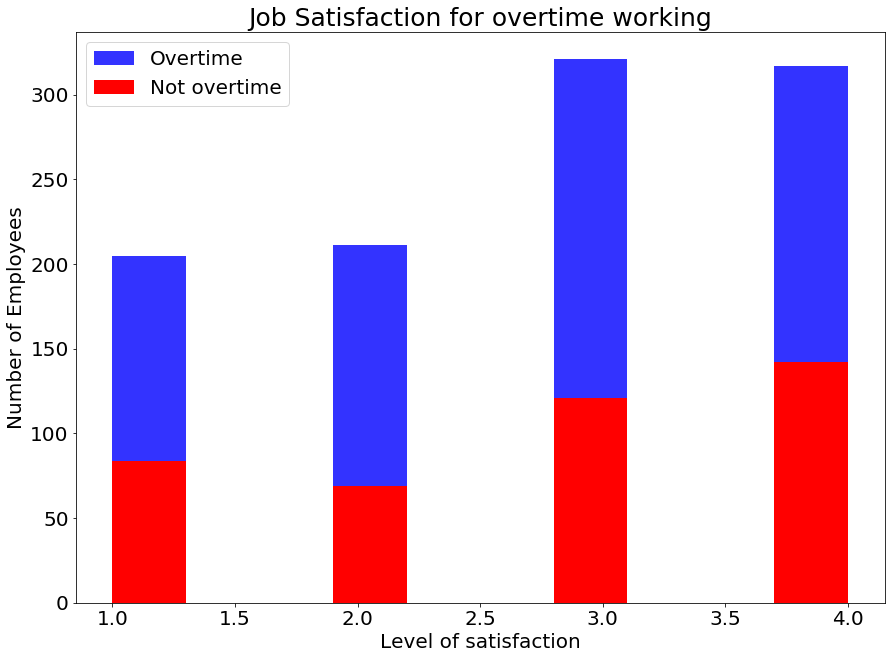

In [69]:
h1=a1.JobSatisfaction.values
h2=a2.JobSatisfaction.values
plt.title('Job Satisfaction for overtime working',fontsize=25)
fig = plt.gcf()
fig.set_size_inches(14.5, 10.5)
plt.hist(h1,alpha=0.8, label='Overtime',color='b')
plt.hist(h2,alpha=1.0, label='Not overtime',color='r')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Level of satisfaction',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper left')
plt.show()

Overtime also seems to have no effect to the job satisfaction. Let's do the t-test with the hypothesis that overtime has no impact.

In [70]:
a1=a1.JobSatisfaction
a2=a2.JobSatisfaction
t, p =stats.ttest_ind(a1,a2,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(mst_vs_jsf)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = -0.940501  p = 0.347115
T value with alpha=0.05 is: 1.64589


Obviously, we can accept the statement that over time has no impact to the job satisfaction with the confidence of 65.3%.

### **2.2.5 Monthly Income against Job Satisfaction**

In [71]:
mon_vs_jsf=data[[target_2,'MonthlyIncome']]
mon_vs_jsf.head()

,JobSatisfaction,MonthlyIncome
0,4,5993
1,2,5130
2,3,2090
3,3,2909
4,2,3468


In [72]:
a1=mon_vs_jsf[(mon_vs_jsf.JobSatisfaction==1)] #job satisfaction level 1 vs Income
a2=mon_vs_jsf[(mon_vs_jsf.JobSatisfaction==2)] #job satisfaction level 2 vs Income
a3=mon_vs_jsf[(mon_vs_jsf.JobSatisfaction==3)] #job satisfaction level 3 vs Income
a4=mon_vs_jsf[(mon_vs_jsf.JobSatisfaction==4)] #job satisfaction level 4 vs Income

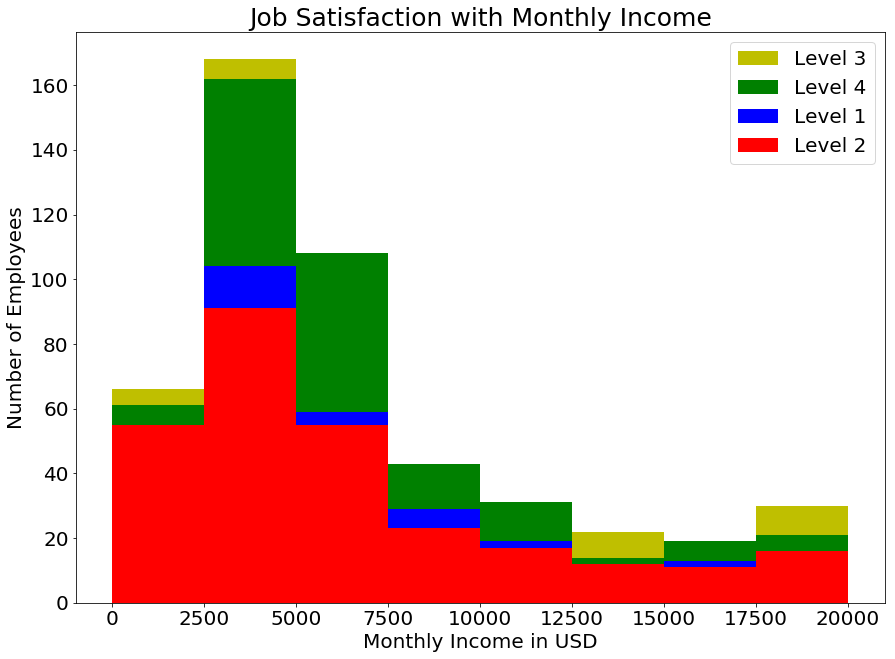

In [73]:
h1=a1.MonthlyIncome.values
h2=a2.MonthlyIncome.values
h3=a3.MonthlyIncome.values
h4=a4.MonthlyIncome.values
plt.title('Job Satisfaction with Monthly Income',fontsize=25)
fig = plt.gcf()
bins_plt=range(0,22500,2500)
fig.set_size_inches(14.5, 10.5)
plt.hist(h3,alpha=1.0,bins=bins_plt, label='Level 3',color='y')
plt.hist(h4,alpha=1.0,bins=bins_plt, label='Level 4',color='g')
plt.hist(h1,alpha=1.0,bins=bins_plt, label='Level 1',color='b')
plt.hist(h2,alpha=1.0,bins=bins_plt, label='Level 2',color='r')
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20) 
plt.xlabel('Monthly Income in USD',fontsize=20)
plt.ylabel('Number of Employees',fontsize=20)
plt.legend(loc='upper right')
plt.show()


Again, there is not much difference to the job satisfaction when the monthly income varies. Let's propose the hypothesis that no impact from the monthly income lower than 7500 USD to the job satisfation.

In [74]:
a1=mon_vs_jsf[mon_vs_jsf.MonthlyIncome<=7500]['JobSatisfaction'] ## lower than 7500
a2=mon_vs_jsf[mon_vs_jsf.MonthlyIncome>7500]['JobSatisfaction']  ## greater than 7500

In [75]:
t, p =stats.ttest_ind(a1,a2,equal_var=True)
print("ttest_ind:            t = %g  p = %g" % (t, p))
t_real=stats.t.ppf(0.95,len(mst_vs_jsf)-2)
print('T value with alpha=0.05 is: %g'%t_real)

ttest_ind:            t = 0.392093  p = 0.695046
T value with alpha=0.05 is: 1.64589


We can only confirm with 30 % of confidence that monthly income does not affect the job satisfaction. Further investigation should be conducted.

## **3. Conclusion**

For each target, we selected randomly five factors to evaluate their effects to the target. Particularly, the attrition rate is 16 % for the fictional data set and seems reasonable. Based on our investigation, the employees left the company because: 
* Low monthly income (lower than 7500 USD)
* Work less than 10 years for the company
* Living in area near the company within 10 km
* Educated in the field of Medical or Life Science
* Work over time

For the case of Job Satisfaction, suprisingly, there are none of five randomly selected factors that has impact to this target. Namely, the Job Satisfaction is independent of Gender, working Departments, Overtime working conditions, Marital Status and Monthly Income. However, the confidence for these statements are not high, lower than 80 %, thus further research or other statistical test model should be conducted to conclude the final effect.
In brief, we can qualitatively predict that an employee will leave the company if:
* He/she has to work overtime
* His/her salary is lower than 7500 USD
* He/she is living in the range of 10 km around the company